In [1]:
!pip install libsvm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch

# Set the number of data points
n = 500

# Set the range of x
x_min, x_max = -100, 100

# Generate equally spaced values of x
x = torch.linspace(x_min, x_max, n)

# store x val for future scaling
x_init = x

# store rand_perm for future scaling
rand_perm = torch.randperm(n)

# store split info for future scaling
split_rate = 0.8
split_num = int(n*split_rate)

# Generate noise
noise = torch.randn(n)

# Generate y values
y = 2 * x + noise

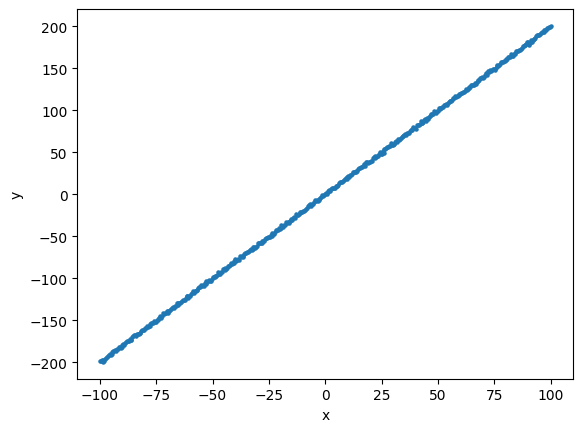

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# random perm
# split train test

x = x.unsqueeze(1)
y = y.unsqueeze(1)

x = x[rand_perm]
y = y[rand_perm]
xy = torch.cat((x, y), dim=1)
print(xy.shape)

train_data = xy.numpy()[:split_num]
test_data = xy.numpy()[split_num:]
print(len(train_data))

# y=2x
train_label = torch.sign(2 * x - y).numpy().squeeze().tolist()[:split_num]
test_label = torch.sign(2 * x - y).numpy().squeeze().tolist()[split_num:]

torch.Size([500, 2])
400


In [5]:
from libsvm.svmutil import *
from libsvm import svmutil
import scipy
import scipy.constants

In [6]:
svm_model = svmutil.svm_train(train_label, train_data, "-s 1 -t 2 -d 2 -c 0.125 -g 0.000030517578125 -w1 1 -w-1 6 -v 5")
svm_model = svmutil.svm_train(train_label, train_data, "-s 1 -t 2 -d 2 -c 0.125 -g 0.000030517578125 -w1 1 -w-1 6")
label, acc, vals = svmutil.svm_predict(test_label, test_data, svm_model)

Cross Validation Accuracy = 85.75%
Accuracy = 90% (90/100) (classification)


In [7]:
Cross_Validation_Accuracy = []
for i in range(-15, 16):
    c = 2 ** i
    for j in range(-15, 16):
        g = 2 ** j
        print(i, j)
        print("(c, g) = ( " + str(c) + ", " + str(g) + " )")
        para_str = '-s 1 -t 2 -d 2 -c ' + str(c) + ' -g ' + str(g) + ' -w1 1 -w-1 6 -v 5'
        svm_model = svmutil.svm_train(train_label, train_data, para_str)
        Cross_Validation_Accuracy.append((svm_model, para_str, c, g))

-15 -15
(c, g) = ( 3.0517578125e-05, 3.0517578125e-05 )
Cross Validation Accuracy = 85.25%
-15 -14
(c, g) = ( 3.0517578125e-05, 6.103515625e-05 )
Cross Validation Accuracy = 87.5%
-15 -13
(c, g) = ( 3.0517578125e-05, 0.0001220703125 )
Cross Validation Accuracy = 91%
-15 -12
(c, g) = ( 3.0517578125e-05, 0.000244140625 )
Cross Validation Accuracy = 88.25%
-15 -11
(c, g) = ( 3.0517578125e-05, 0.00048828125 )
Cross Validation Accuracy = 87%
-15 -10
(c, g) = ( 3.0517578125e-05, 0.0009765625 )
Cross Validation Accuracy = 83.75%
-15 -9
(c, g) = ( 3.0517578125e-05, 0.001953125 )
Cross Validation Accuracy = 82.25%
-15 -8
(c, g) = ( 3.0517578125e-05, 0.00390625 )
Cross Validation Accuracy = 82.75%
-15 -7
(c, g) = ( 3.0517578125e-05, 0.0078125 )
Cross Validation Accuracy = 78.25%
-15 -6
(c, g) = ( 3.0517578125e-05, 0.015625 )
Cross Validation Accuracy = 73.5%
-15 -5
(c, g) = ( 3.0517578125e-05, 0.03125 )
Cross Validation Accuracy = 71.25%
-15 -4
(c, g) = ( 3.0517578125e-05, 0.0625 )
Cross Validat

In [8]:
sorted_CVA = sorted(Cross_Validation_Accuracy, key=lambda x: x[0], reverse=True)

In [9]:
# TOP 3 (cross fold) and predicted results
print("TOP 3 results:")
for i in range(3):
    print("< " + str(i+1) + " >")
    print("CVA:", sorted_CVA[i][0])
    print("para_str:", sorted_CVA[i][1])
    para_str = '-s 1 -t 2 -d 2 -c ' + str(sorted_CVA[i][2]) + ' -g ' + str(sorted_CVA[i][3]) + ' -w1 1 -w-1 6'
    svm_model = svmutil.svm_train(train_label, train_data, para_str)
    label, acc, vals = svmutil.svm_predict(test_label, test_data, svm_model)

TOP 3 results:
< 1 >
CVA: 92.75
para_str: -s 1 -t 2 -d 2 -c 128 -g 0.0001220703125 -w1 1 -w-1 6 -v 5
Accuracy = 93% (93/100) (classification)
< 2 >
CVA: 91.5
para_str: -s 1 -t 2 -d 2 -c 0.001953125 -g 0.0001220703125 -w1 1 -w-1 6 -v 5
Accuracy = 93% (93/100) (classification)
< 3 >
CVA: 91.5
para_str: -s 1 -t 2 -d 2 -c 256 -g 0.0001220703125 -w1 1 -w-1 6 -v 5
Accuracy = 93% (93/100) (classification)


In [10]:
# scaling [-100, 100] --> [-1, 1]
old_upper = 100
old_lower = -100
new_upper = 1
new_lower = -1
x = ( new_upper - new_lower ) * ( x_init - old_lower ) / ( old_upper - old_lower ) + new_lower

In [11]:
# Generate y values
y = 2 * x + noise

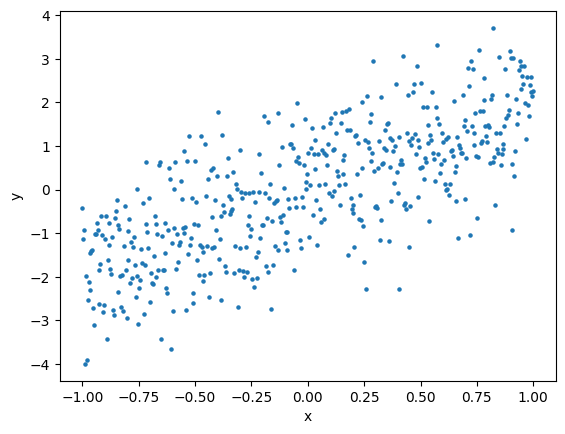

In [12]:
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
# random perm
# split train test

x = x.unsqueeze(1)
y = y.unsqueeze(1)

x = x[rand_perm]
y = y[rand_perm]
xy = torch.cat((x, y), dim=1)
print(xy.shape)

train_data = xy.numpy()[:split_num]
test_data = xy.numpy()[split_num:]
print(len(train_data))

# y=2x
train_label = torch.sign(2 * x - y).numpy().squeeze().tolist()[:split_num]
test_label = torch.sign(2 * x - y).numpy().squeeze().tolist()[split_num:]

torch.Size([500, 2])
400


In [14]:
para_str = '-s 1 -t 2 -d 2 -c ' + str(sorted_CVA[0][2]) + ' -g ' + str(sorted_CVA[0][3]) + ' -w1 1 -w-1 6 -v 5'
svm_model = svmutil.svm_train(train_label, train_data, para_str)
para_str = '-s 1 -t 2 -d 2 -c ' + str(sorted_CVA[0][2]) + ' -g ' + str(sorted_CVA[0][3]) + ' -w1 1 -w-1 6'
svm_model = svmutil.svm_train(train_label, train_data, para_str)
label, acc, vals = svmutil.svm_predict(test_label, test_data, svm_model)

Cross Validation Accuracy = 93.75%
Accuracy = 96% (96/100) (classification)


In [15]:
# scaling [-100, 100] --> [0, 1]
old_upper = 100
old_lower = -100
new_upper = 1
new_lower = 0
x = ( new_upper - new_lower ) * ( x_init - old_lower ) / ( old_upper - old_lower ) + new_lower

In [16]:
# Generate y values
y = 2 * x + noise

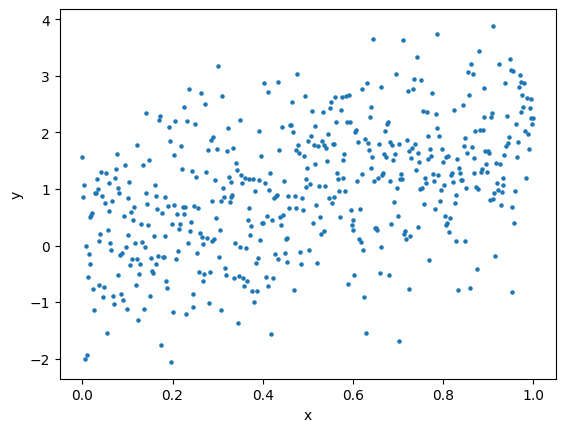

In [17]:
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
# random perm
# split train test

x = x.unsqueeze(1)
y = y.unsqueeze(1)

x = x[rand_perm]
y = y[rand_perm]
xy = torch.cat((x, y), dim=1)
print(xy.shape)

train_data = xy.numpy()[:split_num]
test_data = xy.numpy()[split_num:]
print(len(train_data))

# y=2x
train_label = torch.sign(2 * x - y).numpy().squeeze().tolist()[:split_num]
test_label = torch.sign(2 * x - y).numpy().squeeze().tolist()[split_num:]

torch.Size([500, 2])
400


In [19]:
para_str = '-s 1 -t 2 -d 2 -c ' + str(sorted_CVA[0][2]) + ' -g ' + str(sorted_CVA[0][3]) + ' -w1 1 -w-1 6 -v 5'
svm_model = svmutil.svm_train(train_label, train_data, para_str)
para_str = '-s 1 -t 2 -d 2 -c ' + str(sorted_CVA[0][2]) + ' -g ' + str(sorted_CVA[0][3]) + ' -w1 1 -w-1 6'
svm_model = svmutil.svm_train(train_label, train_data, para_str)
label, acc, vals = svmutil.svm_predict(test_label, test_data, svm_model)

Cross Validation Accuracy = 87.5%
Accuracy = 92% (92/100) (classification)
